# Ejercicios Modulo 5. Excel y CSV (Enunciado)

Consideraciones a tener en cuenta: 

* Guardar este documento con el siguiente formato para su entrega: __M5_02_nombre_apellido1_apellido2__
* Realizar los ejercicios con las herramientas vistas en las sesiones. 
* Comentar el código
* Utilizar nombres de variables apropiados, si vais a guardar una nota, llamar a esa variable nota, no n o x

__Recomendación:__ Haz una copia de los ficheros antes de empezar a modificarlos para siempre poder recuperar una versión original de los mismos.

## EXCEL

**1) Ejercicio de manejo de Excel en base al fichero 02_Excel_data.xlsx:**
* Abre el fichero Excel
* Lista las hojas que hay
* Crea una nueva hoja que se llame olimpiadas entre ventas y otros
* Vuelve a listar las hojas que hay
* Guarda los cambios y comprueba en el excel si se han efectuado

In [ ]:
import openpyxl

wb = openpyxl.Workbook()

# Seleccionar la hoja activa (por defecto, es la primera hoja)
hoja_activa = wb.active

# Añadir datos de ejemplo a la hoja de cálculo
hoja_activa['A1'] = 'Ejemplo'
hoja_activa['B1'] = 'Datos'

# Guardar el archivo
wb.save('ejemplo_excel.xlsx')

print("Documento de Excel creado exitosamente.")
# creando hojas
hoja_activa = wb.create_chartsheet("ventas") 
hoja_uno = wb["ventas"]
hoja_activa = wb.create_chartsheet("Olimpiadas") 
hoja_dos = wb["Olimpiadas"]
hoja_activa = wb.create_chartsheet("Otros")
hoja_tres = wb["Otros"] 
wb.save()  

# mostramos las hojas de excel
print("Nombre de hojas: ")
print(wb.sheetnames)


print("\nNombre de hojas:")
for sheet in wb:
  print("-",sheet.title)

# Guardar el archivo
wb.save('ejemplo_excel.xlsx')




**2) Continuemos con Excel**
* Crea una lista que contenga los siguientes datos olímpicos (nombre del país y medallas de oro, plata y bronce):
```
USA, 46, 12, 5
China, 38, 20, 7
UK, 29, 7, 7
Russia, 22, 10, 9
South Korea, 13, 3, 2
Germany, 11, 7, 4
```
* Añadir esa lista a la hoja de olimpiadas que creamos en el ejercicio anterior
* Listar por filas y columnas el contenido
* Mover todo el rango de datos una fila hacia abajo (buscar en la documentación como mover rangos)
* Añadir unas cabeceras en la primera línea (que acaba de quedar libre) que sean "Pais", "Oros", "Platas", "Bronces"
* Guarda los cambios y comprueba en el excel si se han efectuado

In [ ]:
import openpyxl

# Abre el libro de Excel existente o crea uno nuevo
workbook = openpyxl.load_workbook('tu_archivo.xlsx')  # Reemplaza 'tu_archivo.xlsx' con el nombre de tu archivo
sheet = workbook['olimpiadas']

# Crea una lista con los datos olímpicos
datos_olimpicos = [
    ["USA", 46, 12, 5],
    ["China", 38, 20, 7],
    ["UK", 29, 7, 7],
    ["Russia", 22, 10, 9],
    ["South Korea", 13, 3, 2],
    ["Germany", 11, 7, 4]
]

# Añade la lista a la hoja de olimpiadas
for fila_datos in datos_olimpicos:
    sheet.append(fila_datos)

# Lista por filas y columnas el contenido
for fila in sheet.iter_rows(min_row=1, max_col=4, values_only=True):
    print(fila)

for columna in sheet.iter_cols(min_row=1, max_row=len(datos_olimpicos) + 1, values_only=True):
    print(columna)

# Mueve todo el rango de datos una fila hacia abajo
sheet.move_range("A1:D7", rows=1, cols=0)

# Añade las cabeceras en la primera línea
cabeceras = ["Pais", "Oros", "Platas", "Bronces"]
for col_num, cabecera in enumerate(cabeceras, start=1):
    sheet.cell(row=1, column=col_num, value=cabecera)

# Guarda los cambios
workbook.save('ejemplo_excel.xlsx')  # Reemplaza 'tu_archivo_modificado.xlsx' con el nombre deseado



**3) Continuemos con Excel, centrandonos en la parte de la librería openpyxl.styles (la cual proporciona estilo a nuestras hojas de Excel)**
* Poner las cabeceras que acabamos de añadir en negrita (bold)
* Guarda los cambios y comprueba en el excel si se han efectuado

Pista: Aunque hay varias formas de hacerlo, lo más común es definir el estilo que deseas (negrita) y luego aplicárselo a todas las celdas que quieras (iterar por la primera fila de nuestra hoja)

Doc: https://openpyxl.readthedocs.io/en/stable/styles.html

In [ ]:
import openpyxl
from openpyxl.styles import Font

# Abre el libro de Excel existente o crea uno nuevo
workbook = openpyxl.load_workbook('ejemplo_excel.xlsx')  # Reemplaza 'tu_archivo_modificado.xlsx' con el nombre de tu archivo
sheet = workbook['olimpiadas']

# Definir el estilo en negrita
negrita = Font(bold=True)

# Aplicar el estilo a todas las celdas de la primera fila
for cell in sheet[1]:
    cell.font = negrita

# Guarda los cambios
workbook.save('ejemplo_excel.xlsx')  # Reemplaza 'tu_archivo_modificado_estilo.xlsx' con el nombre deseado


**4) Continuamos con Excel. Crea una nueva columna que sea el sumatorio de todas las medallas conseguidas por cada uno de los paises**

In [ ]:
import openpyxl

# Abre el libro de Excel existente o crea uno nuevo
workbook = openpyxl.load_workbook('tu_archivo_modificado_estilo.xlsx')  # Reemplaza 'tu_archivo_modificado_estilo.xlsx' con el nombre de tu archivo
sheet = workbook['olimpiadas']

# Añade una nueva columna al final para el sumatorio de medallas
sheet.cell(row=1, column=5, value='Total Medallas')  # Agrega el encabezado

# Calcula y suma las medallas por cada país
for row in range(2, sheet.max_row + 1):
    total_medallas = sum(sheet.cell(row=row, column=col).value for col in range(2, 5))
    sheet.cell(row=row, column=5, value=total_medallas)

# Guarda los cambios
workbook.save('ejemplo_excel.xlsx')  # Reemplaza 'tu_archivo_con_sumatorio.xlsx' con el nombre deseado


**5) Continuamos con Excel. Crear un gráfico de barras (openpyxl.chart.BarChart()) lo más parecido al que se muestra en la imagen:**

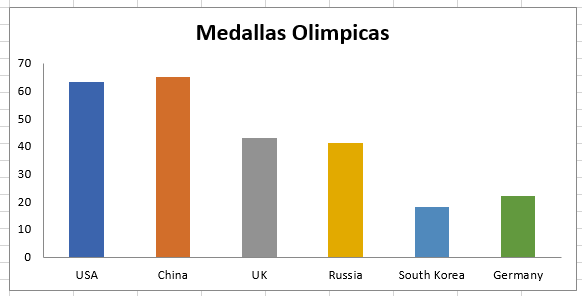

In [ ]:
import openpyxl
from openpyxl.chart import BarChart, Reference

# Abre el libro de Excel existente o crea uno nuevo
workbook = openpyxl.load_workbook('tu_archivo_con_sumatorio.xlsx')  # Reemplaza 'tu_archivo_con_sumatorio.xlsx' con el nombre de tu archivo
sheet = workbook['olimpiadas']

# Crear un objeto de gráfico de barras
chart = BarChart()
chart.title = "Medallas por País"
chart.x_axis.title = "Países"
chart.y_axis.title = "Total Medallas"

# Seleccionar los datos para el gráfico
data = Reference(sheet, min_col=1, min_row=2, max_col=5, max_row=sheet.max_row)
categories = Reference(sheet, min_col=1, min_row=2, max_row=sheet.max_row)

# Agregar datos al gráfico
chart.add_data(data, titles_from_data=True)
chart.set_categories(categories)

# Ajustar el tamaño del gráfico
chart.width = 15
chart.height = 10

# Agregar el gráfico a la hoja de cálculo
sheet.add_chart(chart, "G2")

# Guardar los cambios
workbook.save('ejemplo_excel.xlsx')  



## CSV

**Vamos a realizar un ejercicio práctico de minería de datos, donde limpiaremos y filtraremos información con un csv que contiene datos de vehículos**

Trabajaremos con el fichero **02_CSV_data.csv**

**6) Observa los datos del csv y realiza las siguientes tareas:**

* Tenemos 9 columnas, las 8 primeras contienen datos numéricos con los cuales podemos trabajar, crea una lista para cada una de estas columnas (mpg, cylinders, etc.). No es necesario crear lista para name
* Recorre los datos del csv adecuadamente y almacena los datos de cada columna en cada una de las listas que has creado anteriormente.
* Comprobar que se haya guardado en las listas la información correspondiente (con prints)

In [ ]:
import csv

# Listas para almacenar los datos
mpg = []
cylinders = []
displacement = []
horsepower = []
weight = []
acceleration = []
model_year = []
origin = []

# Abrir el archivo CSV y leer los datos
with open('nombre_del_archivo.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Saltar la primera fila que contiene los encabezados
    for row in csv_reader:
        # Almacenar los datos en las listas correspondientes
        mpg.append(float(row[0]))
        cylinders.append(int(row[1]))
        displacement.append(float(row[2]))
        horsepower.append(float(row[3]))
        weight.append(float(row[4]))
        acceleration.append(float(row[5]))
        model_year.append(int(row[6]))
        origin.append(int(row[7]))

# Comprobar que se haya guardado la información correctamente en las listas
print("MPG:", mpg)
print("Cylinders:", cylinders)
print("Displacement:", displacement)
print("Horsepower:", horsepower)
print("Weight:", weight)
print("Acceleration:", acceleration)
print("Model Year:", model_year)
print("Origin:", origin)


**7) Vamos a trabajar con los números de nuestras listas por lo que nos sobra el primer elemento de cada lista, el cual contiene el nombre de cada una de las columnas.**

* Elimina el primer elemento de cada una de las listas
* Observa que los datos de nuestras listas son strings, conviértelos a float. Pista: list y map te pueden ayudar.
* Comprobar que se haya eliminado el primer elemento y que los datos son numéricos (con prints)

In [ ]:
# Eliminar el primer elemento de cada lista
del mpg[0]
del cylinders[0]
del displacement[0]
del horsepower[0]
del weight[0]
del acceleration[0]
del model_year[0]
del origin[0]

# Convertir los datos de las listas a números flotantes
mpg = list(map(float, mpg))
cylinders = list(map(float, cylinders))
displacement = list(map(float, displacement))
horsepower = list(map(float, horsepower))
weight = list(map(float, weight))
acceleration = list(map(float, acceleration))
model_year = list(map(float, model_year))
origin = list(map(float, origin))

# Comprobar que se haya eliminado el primer elemento y que los datos son numéricos
print("MPG:", mpg)
print("Cylinders:", cylinders)
print("Displacement:", displacement)
print("Horsepower:", horsepower)
print("Weight:", weight)
print("Acceleration:", acceleration)
print("Model Year:", model_year)
print("Origin:", origin)


**8) Para terminar vamos a mostrar algunos resultados. Para ello utilizaremos la librería statistics.**

* Muestra para cada una de las listas, cuantas observaciones tiene (cuántos datos tiene).
* Mostrar el mínimo y el máximo de cada lista
* Mostrar la media, mediana y desviación estándar de cada lista (utilizando statistics)

In [ ]:
import statistics

# Mostrar el número de observaciones para cada lista
print("Número de observaciones:")
print("MPG:", len(mpg))
print("Cylinders:", len(cylinders))
print("Displacement:", len(displacement))
print("Horsepower:", len(horsepower))
print("Weight:", len(weight))
print("Acceleration:", len(acceleration))
print("Model Year:", len(model_year))
print("Origin:", len(origin))

# Mostrar el mínimo y el máximo de cada lista
print("\nMínimo y máximo:")
print("MPG - Mínimo:", min(mpg), "Máximo:", max(mpg))
print("Cylinders - Mínimo:", min(cylinders), "Máximo:", max(cylinders))
print("Displacement - Mínimo:", min(displacement), "Máximo:", max(displacement))
print("Horsepower - Mínimo:", min(horsepower), "Máximo:", max(horsepower))
print("Weight - Mínimo:", min(weight), "Máximo:", max(weight))
print("Acceleration - Mínimo:", min(acceleration), "Máximo:", max(acceleration))
print("Model Year - Mínimo:", min(model_year), "Máximo:", max(model_year))
print("Origin - Mínimo:", min(origin), "Máximo:", max(origin))

# Mostrar la media, mediana y desviación estándar de cada lista
print("\nMedia, mediana y desviación estándar:")
print("MPG - Media:", statistics.mean(mpg), "Mediana:", statistics.median(mpg), "Desviación estándar:", statistics.stdev(mpg))
print("Cylinders - Media:", statistics.mean(cylinders), "Mediana:", statistics.median(cylinders), "Desviación estándar:", statistics.stdev(cylinders))
print("Displacement - Media:", statistics.mean(displacement), "Mediana:", statistics.median(displacement), "Desviación estándar:", statistics.stdev(displacement))
print("Horsepower - Media:", statistics.mean(horsepower), "Mediana:", statistics.median(horsepower), "Desviación estándar:", statistics.stdev(horsepower))
print("Weight - Media:", statistics.mean(weight), "Mediana:", statistics.median(weight), "Desviación estándar:", statistics.stdev(weight))
print("Acceleration - Media:", statistics.mean(acceleration), "Mediana:", statistics.median(acceleration), "Desviación estándar:", statistics.stdev(acceleration))
print("Model Year - Media:", statistics.mean(model_year), "Mediana:", statistics.median(model_year), "Desviación estándar:", statistics.stdev(model_year))
print("Origin - Media:", statistics.mean(origin), "Mediana:", statistics.median(origin), "Desviación estándar:", statistics.stdev(origin))
